In [2]:
import copy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def plot_figure(images: list, titles: list, rows: int, columns: int, fig_width=15, fig_height=7):
    fig = plt.figure(figsize=(fig_width, fig_height))
    count = 1
    for image, title in zip(images, titles):
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(image, 'gray')
        plt.axis('off')
        plt.title(title) 

In [4]:
def image_statistics(image, image_name):
    return f"""Statistics of {image_name}:
{'-'*40}
Mean: {image.mean():.4f}
Median: {np.median(image):.4f}
STD: {image.std():.4f}
Maximum Pixel Value: {image.max():.4f}
Minimum Pixel Value: {image.min():.4f}"""

In [5]:
def normalize_image(image):
    return cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Question 1

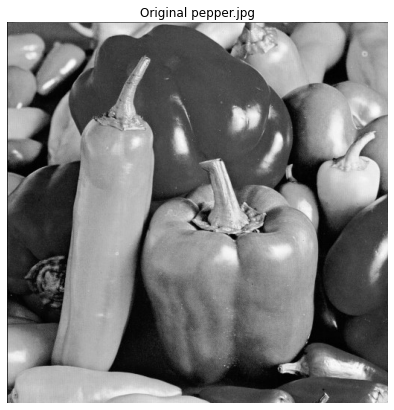

In [6]:
# Read the image and display it
image_name = 'pepper.jpg'
image = cv2.imread(image_name, 0)
plot_figure([image], [f'Original {image_name}'], 1, 1)

## 1.1

In [7]:
image_plus_50 = image + 50

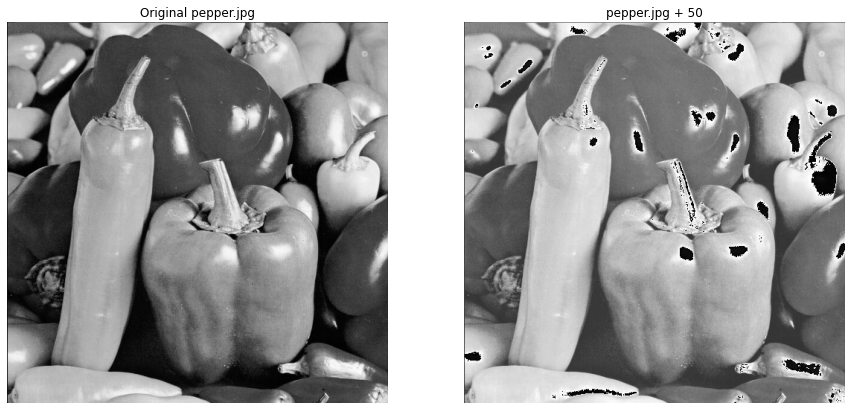

In [8]:
plot_figure([image, image_plus_50], [f'Original {image_name}', f'{image_name} + 50'], 1, 2)

## 1.2

In [9]:
new_image = copy.deepcopy(image)
new_image[(new_image >= 120) & (new_image <= 180)] = 50

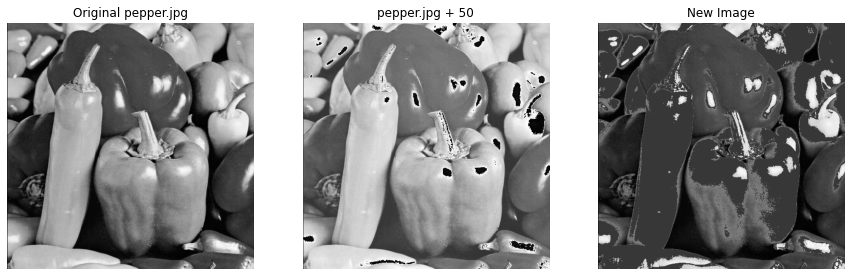

In [10]:
plot_figure(
    [image, image_plus_50, new_image],
    [f'Original {image_name}', f'{image_name} + 50', f'New Image'],
    1, 3
)

## 1.3

In [11]:
log_image = np.log10(image+1)
log_image = np.array(log_image, dtype=np.float32)

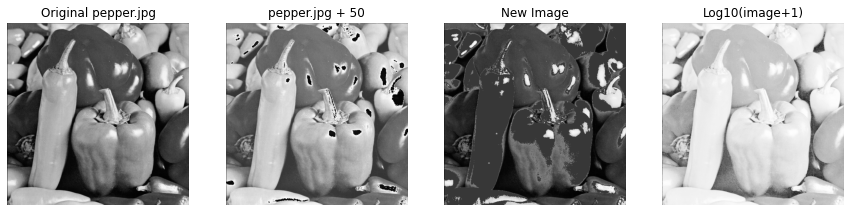

In [12]:
plot_figure(
    [image, image_plus_50, new_image, log_image],
    [f'Original {image_name}', f'{image_name} + 50', f'New Image', 'Log10(image+1)'],
    1, 4
)

Log10 brightened the original image and made the image look smoother.

# Question 2

## 2.1

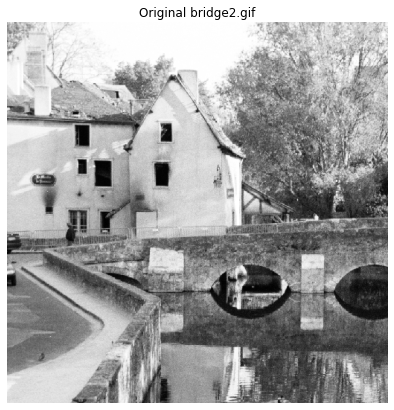

In [13]:
# Read the image and display it
image_name = 'bridge2.gif'
image = np.array(Image.open(image_name))
plot_figure([image], [f'Original {image_name}'], 1, 1)

## 2.2

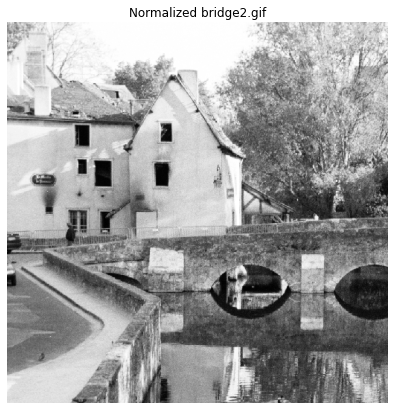

In [14]:
# Normalize the image between 0, 1
norm_image = normalize_image(image)
plot_figure([norm_image], [f'Normalized {image_name}'], 1, 1)

## 2.2.a

In [15]:
# Apply T(r) = c*log10(r+1) function on the normalized image
c = 1 / np.log(1 + np.max(norm_image))
log_image = c * np.log10(norm_image + 1)

In [ ]:
plot_figure([norm_image, log_image], [f'Normalized {image_name}', f'T(r) = c*log10(r+1)'], 1, 2)

## 2.2.b

In [16]:
# Apply T(r)=(10^c*r)–1 function on the normalized image
c = 1
powered_image = np.power(10, norm_image*c) - 1

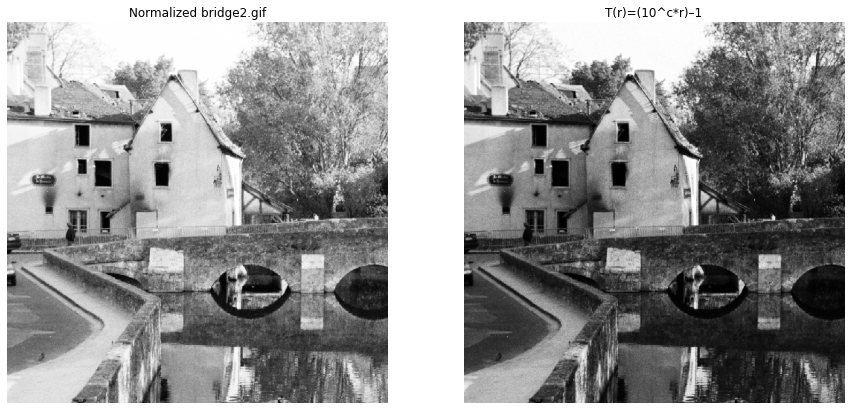

In [17]:
plot_figure([norm_image, powered_image], [f'Normalized {image_name}', f'T(r)=(10^c*r)–1'], 1, 2)

## 2.2.c

In [18]:
# Apply Linear Stretching on the normalized image
min_val, max_val = norm_image.min(), norm_image.max()
MIN, MAX = 0, 1
linear_stretched_image = ((norm_image-min_val)/(max_val-min_val))*(MAX-MIN)+MIN

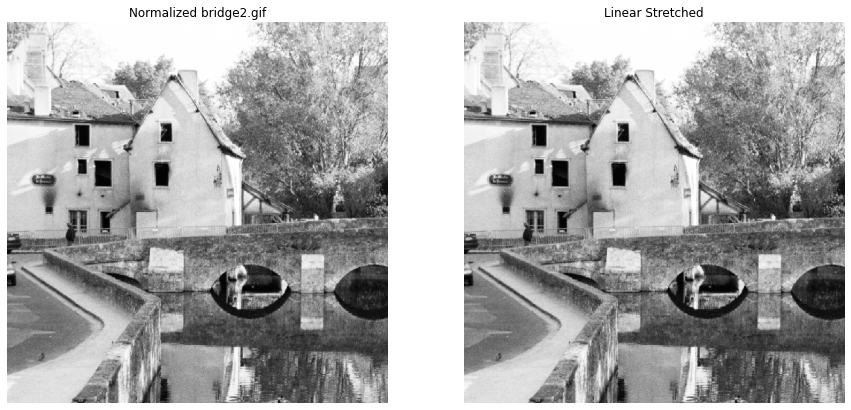

In [19]:
plot_figure(
    [norm_image,linear_stretched_image],
    [f'Normalized {image_name}', f'Linear Stretched'], 1, 2
)

# Statistics (Mean, STD, Maximum, Minimum)

In [20]:
print(image_statistics(image, f'Original {image_name}'))

Statistics of Original bridge2.gif:
----------------------------------------
Mean: 161.1893
Median: 164.0000
STD: 58.0146
Maximum Pixel Value: 254.0000
Minimum Pixel Value: 22.0000


In [21]:
print(image_statistics(norm_image, f'Normalized {image_name}'))

Statistics of Normalized bridge2.gif:
----------------------------------------
Mean: 0.6000
Median: 0.6121
STD: 0.2501
Maximum Pixel Value: 1.0000
Minimum Pixel Value: 0.0000


In [22]:
print(image_statistics(log_image, f'T(r) = c*log10(r+1) {image_name}'))

Statistics of T(r) = c*log10(r+1) bridge2.gif:
----------------------------------------
Mean: 0.2864
Median: 0.2992
STD: 0.1021
Maximum Pixel Value: 0.4343
Minimum Pixel Value: 0.0000


In [23]:
print(image_statistics(powered_image, f'T(r)=(10^c*r)–1 {image_name}'))

Statistics of T(r)=(10^c*r)–1 bridge2.gif:
----------------------------------------
Mean: 3.6459
Median: 3.0933
STD: 2.4706
Maximum Pixel Value: 9.0000
Minimum Pixel Value: 0.0000


In [24]:
print(image_statistics(linear_stretched_image, f'Linear Stretched {image_name}'))

Statistics of Linear Stretched bridge2.gif:
----------------------------------------
Mean: 0.6000
Median: 0.6121
STD: 0.2501
Maximum Pixel Value: 1.0000
Minimum Pixel Value: 0.0000


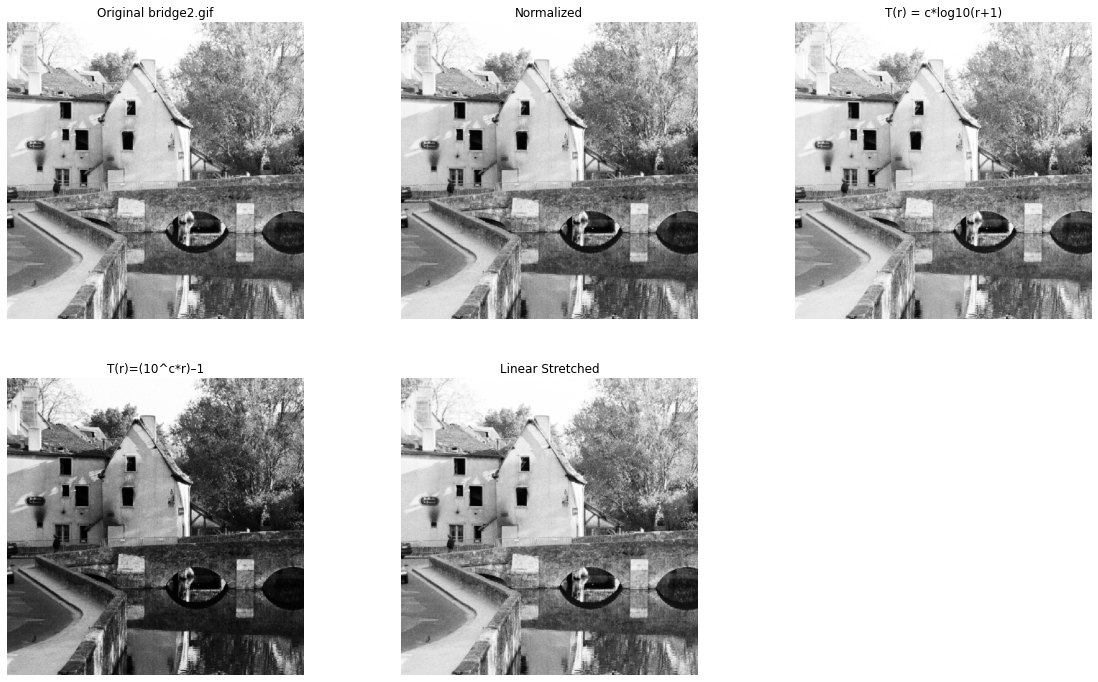

In [25]:
plot_figure(
    [image, norm_image, log_image, powered_image, linear_stretched_image],
    [f'Original {image_name}', f'Normalized', f'T(r) = c*log10(r+1)', f'T(r)=(10^c*r)–1', f'Linear Stretched'],
    rows=2,
    columns=3,
    fig_width=20,
    fig_height=12
)

# Question 3

## 3.1

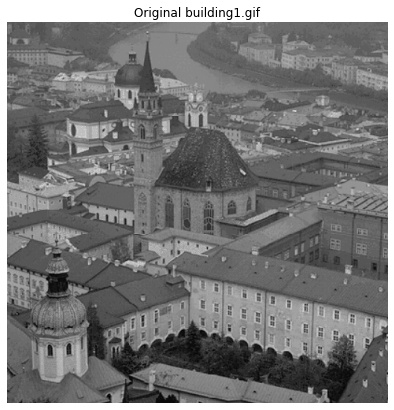

In [26]:
# Read the image and display it
image_name = 'building1.gif'
image = np.array(Image.open(image_name))
plot_figure([image], [f'Original {image_name}'], 1, 1)

## 3.2

In [27]:
print(image_statistics(image, image_name))

Statistics of building1.gif:
----------------------------------------
Mean: 81.9573
Median: 80.0000
STD: 26.8139
Maximum Pixel Value: 198.0000
Minimum Pixel Value: 0.0000


The number of pixels that have a gray level value of 128.

In [28]:
image[image == 128].size

1518

## 3.3

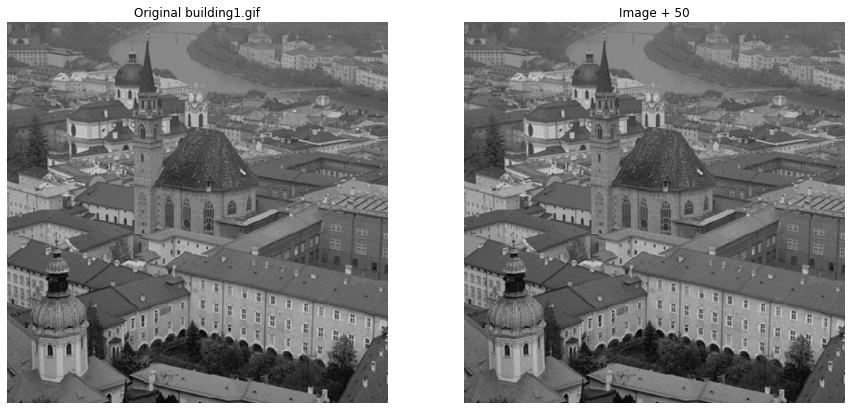

In [29]:
image_plus_50 = image + 50
plot_figure([image, image_plus_50], [f'Original {image_name}', 'Image + 50'], 1, 2)

In [30]:
print(image_statistics(image_plus_50, f'{image_name} + 50'))

Statistics of building1.gif + 50:
----------------------------------------
Mean: 131.9573
Median: 130.0000
STD: 26.8139
Maximum Pixel Value: 248.0000
Minimum Pixel Value: 50.0000


## 3.4
g(x, y) = f(x, y) - min(f(x, y) * 255 / max(f(x, y)) - min(f(x, y))

In [31]:
def g_func(img):
    return 255 / (img.max() - img.min()) * (img - img.min())

In [32]:
modified_image = g_func(image)

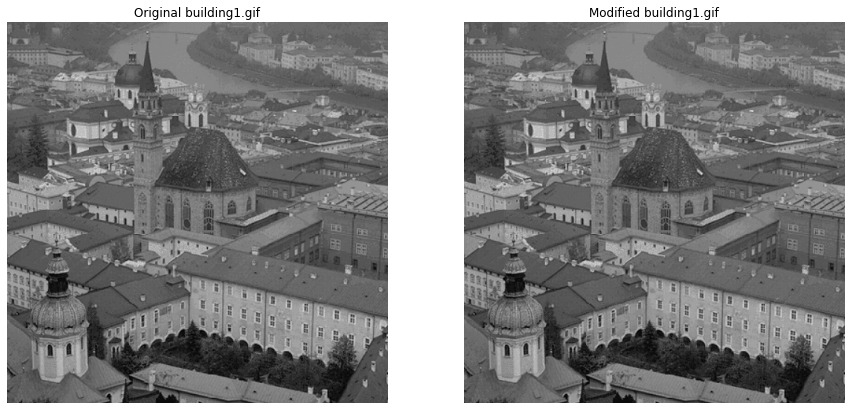

In [33]:
plot_figure([image, modified_image], [f'Original {image_name}', f'Modified {image_name}'], 1, 2)

In [34]:
print(image_statistics(modified_image, f'modified {image_name}'))

Statistics of modified building1.gif:
----------------------------------------
Mean: 105.5510
Median: 103.0303
STD: 34.5331
Maximum Pixel Value: 255.0000
Minimum Pixel Value: 0.0000


In [35]:
modified_image[modified_image == 128].size

0

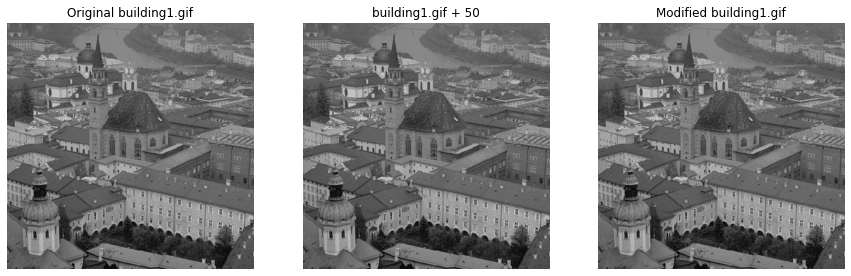

In [36]:
plot_figure([image, image_plus_50, modified_image],
            [f'Original {image_name}', f'{image_name} + 50', f'Modified {image_name}'],
            1, 3)

# Question 4

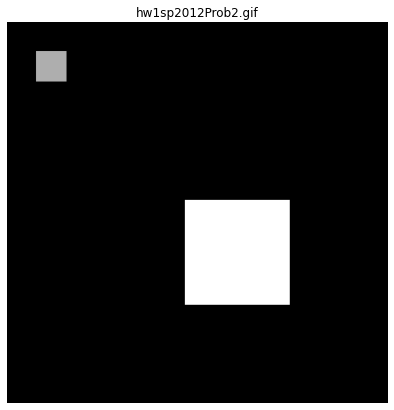

In [37]:
image_name = 'hw1sp2012Prob2.gif'
image = np.array(Image.open(image_name))
plot_figure([image], [image_name], 1, 1)

In [1]:
# small square
small_square_image = copy.deepcopy(image)
small_square_image[small_square_image!=150] = 0
plot_figure([small_square_image], ['small square'], 1, 1)

NameError: name 'copy' is not defined

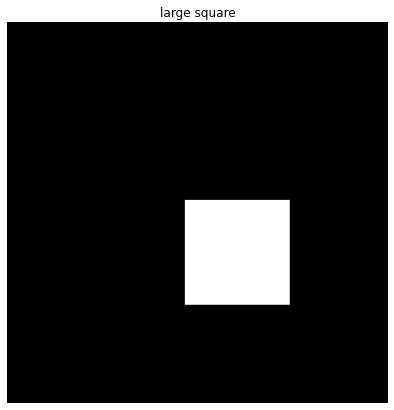

In [39]:
# large square
large_square_image = copy.deepcopy(image)
large_square_image[large_square_image!=220] = 0
plot_figure([large_square_image], ['large square'], 1, 1)

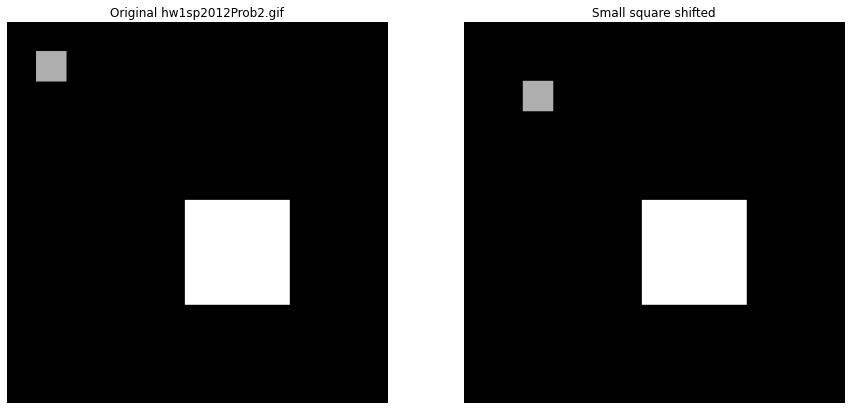

In [40]:
# The small square is to be translated by 40 pixels in both directions.
M = np.float32([[1, 0, 40], [0, 1, 40]])
shifted = cv2.warpAffine(small_square_image, M, (image.shape[1], image.shape[0]))
plot_figure([image, shifted+large_square_image], [f'Original {image_name}', 'Small square shifted'], 1, 2)

## 4.2

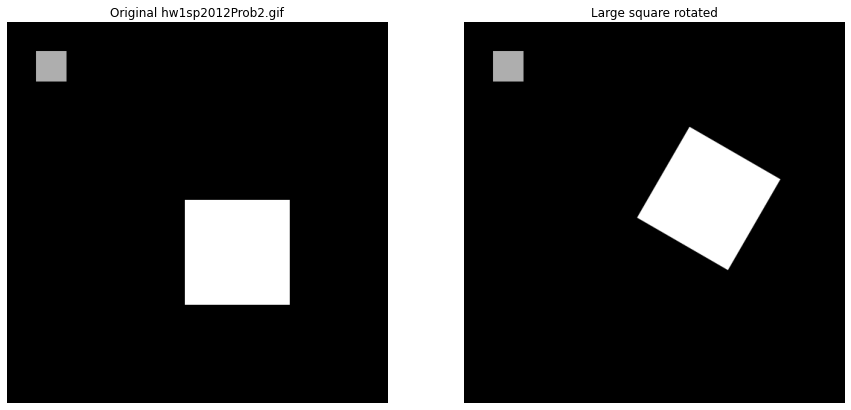

In [41]:
# The large square is to be rotated by 60 degrees counter clockwise.
height, width = large_square_image.shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=60, scale=1)
shifted = cv2.warpAffine(src=large_square_image, M=rotate_matrix, dsize=(width, height))
plot_figure([image, small_square_image+shifted], [f'Original {image_name}', 'Large square rotated'], 1, 2)

# Question 5

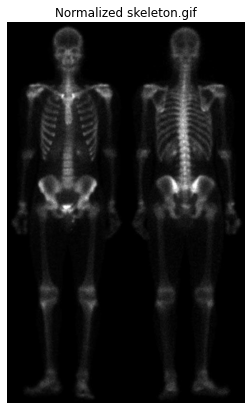

In [42]:
image_name = 'skeleton.gif'
image = np.array(Image.open(image_name))
norm_image = normalize_image(image)
plot_figure([norm_image], [f'Normalized {image_name}'], 1, 1)

## 5.1

In [43]:
# Apply f(x, y) = e^(c*f(x,y)) function on the normalized image.
c = 1
exp_image = np.exp(c*norm_image)

## 5.2

In [44]:
# Apply f(x, y) = c*log10((f(x,y)+1) function on the normalized image.
c = 1
log_image = c * np.log10(norm_image + 1)

## 5.3

In [45]:
# Apply f(x,y)>0.1 --> 2*f(x,y) conditional function on the normalized image.
condition_image = copy.deepcopy(norm_image)
condition_image[condition_image>0.1] = 2*condition_image[condition_image>0.1]

## Display Results

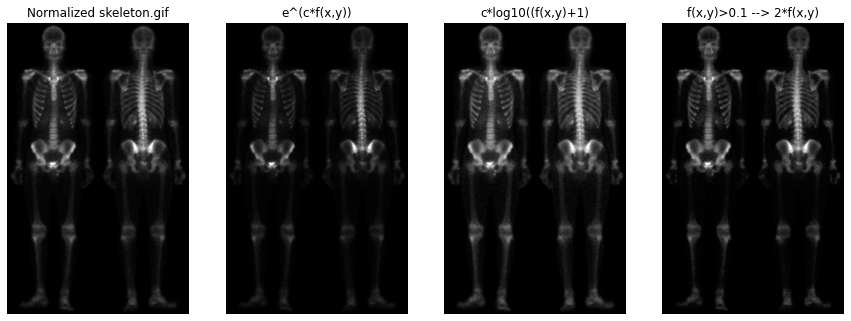

In [46]:
plot_figure(
    [norm_image, exp_image, log_image, condition_image],
    [f'Normalized {image_name}', 'e^(c*f(x,y))', 'c*log10((f(x,y)+1)', 'f(x,y)>0.1 --> 2*f(x,y)'],
    1, 4)

The logarithmic function produces the best result with more visible details.

# Question 6

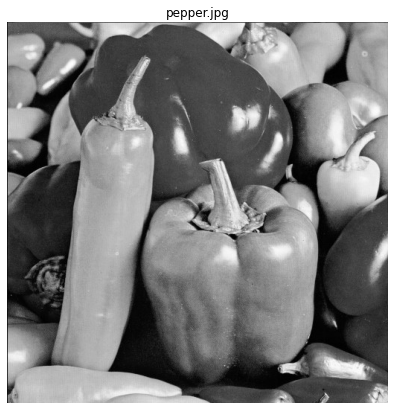

In [47]:
image_name = 'pepper.jpg'
image = cv2.imread(image_name, 0)
plot_figure([image], [image_name], 1, 1)

In [48]:
half_scaled = cv2.resize(image, None, fx=0.5, fy=0.5)
print(f'Original image shape: {image.shape}\nResized image shape: {half_scaled.shape}')

Original image shape: (512, 512)
Resized image shape: (256, 256)


In [49]:
inter_nearest_neighbor = cv2.resize(half_scaled, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
inter_bilinear = cv2.resize(half_scaled, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
inter_linear = cv2.resize(half_scaled, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR_EXACT)

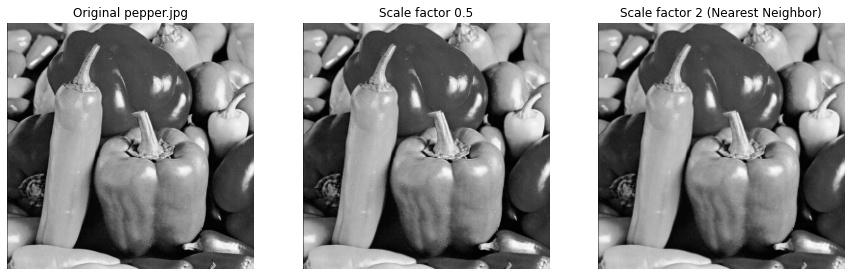

In [50]:
plot_figure(
    [image, half_scaled, inter_nearest_neighbor],
    [f'Original {image_name}', 'Scale factor 0.5', 'Scale factor 2 (Nearest Neighbor)'],
    1, 3)

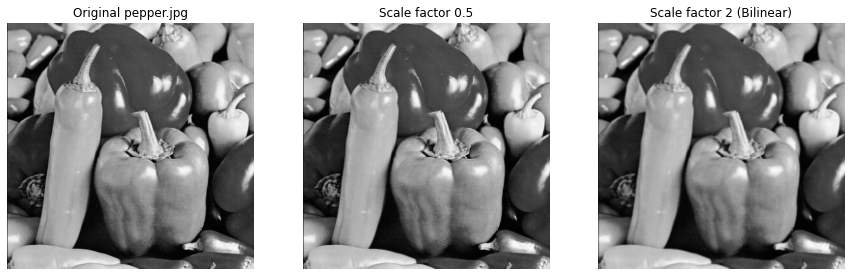

In [51]:
plot_figure(
    [image, half_scaled, inter_bilinear],
    [f'Original {image_name}', 'Scale factor 0.5', 'Scale factor 2 (Bilinear)'],
    1, 3)

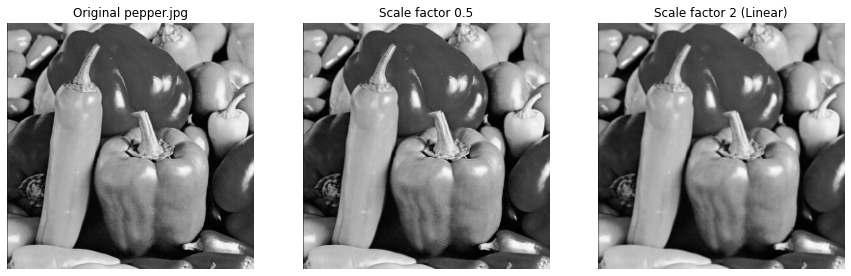

In [52]:
plot_figure(
    [image, half_scaled, inter_linear],
    [f'Original {image_name}', 'Scale factor 0.5', 'Scale factor 2 (Linear)'],
    1, 3)

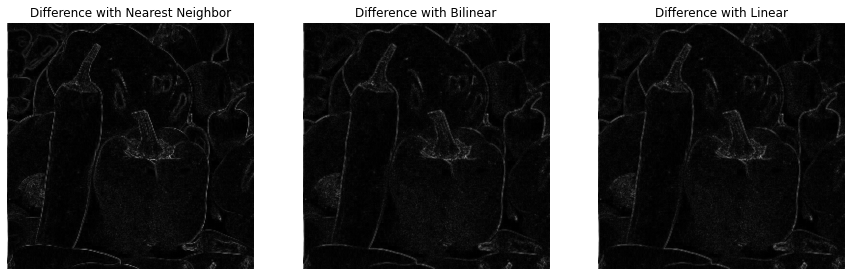

In [53]:
plot_figure(
    [cv2.absdiff(image, inter_nearest_neighbor),
     cv2.absdiff(image, inter_bilinear),
     cv2.absdiff(image, inter_linear)],
    [f'Difference with Nearest Neighbor', 'Difference with Bilinear', 'Difference with Linear'],
    1, 3)